# EXAMEN TELECOM - Juan Martín Elorriaga <a id='inicio'></a>

Para los archivos de origen, véase: [repositorio](https://drive.google.com/drive/folders/1YoDJTtHgTSlhmhtQPBCNoz32ntHhRDTv)

[Ejercicio 1](#ej1) | 
[Ejercicio 2](#ej2) | 
[Ejercicio 3](#ej3) | 
[Ejercicio 4](#ej4) | 
[Ejercicio 5](#ej5) | 
[Ejercicio 6](#ej6) | 
[Ejercicio 7](#ej7) 

Importación de librerías. Para los ejercicios pensados en SQL se utilizará la API *pandasql*.

In [1]:
import pandas as pd
import pandasql as SQL
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Carga de archivos desde entorno local

In [2]:
PATH = r"C:\Users\juanm\OneDrive\Documentos\Python_Scripts\examen_telecom\\"
cliente     = pd.read_csv(PATH + "cliente.csv",     sep=";", encoding='latin-1')
facturacion = pd.read_csv(PATH + "facturacion.csv", sep=";", encoding='latin-1')
llamadas    = pd.read_csv(PATH + "llamadas.csv",    sep=";", encoding='latin-1')
provincia   = pd.read_csv(PATH + "provincia.csv",   sep=";", encoding='latin-1')

Exploración de las distintas tablas disponibles

In [3]:
cliente.head(5)

,Plan_mes,mes,nro_cliente
0,95729,1,1
1,96410,1,3
2,96400,1,2
3,95729,1,5
4,95420,1,4


In [4]:
facturacion.head(5)

,facturacion,nro_cliente,mes
0,935.8301,1,1
1,1352.8632,2,1
2,602.0372,3,1
3,847.5758,4,1
4,423.7930,5,1


In [5]:
llamadas.head(5)

,Cantidad_Llamadas,Duracion_Llamadas_minutos,nro_cliente,mes,tipo_llamada
0,1,285,41,1,Saliente
1,1,30,42,1,Saliente
2,1,30,92,1,Saliente
3,1,30,94,1,Saliente
4,1,80,131,1,Saliente


In [6]:
provincia.head(10)

,provincia,nro_cliente
0,Chaco,1
1,Santa Fe,2
2,Cordoba,3
3,Salta,4
4,Santa Fe,5
5,Corrientes,6
6,Santa Fe,7
7,Chaco,8
8,Buenos Aires,9
9,Chaco,10


## Ejercicio 1 <a id='ej1'></a> 
[Volver al inicio](#inicio)

### Calcular la facturación promedio, máxima, mínima de los últimos tres meses de los clientes 12-15-20.

In [7]:
SQL.sqldf(
    """
    SELECT nro_cliente, AVG(facturacion) "facturacion promedio", MAX(facturacion) "facturacion maxima", MIN(facturacion) "facturacion minima" 
    FROM facturacion 
    WHERE  nro_cliente IN (12, 15, 20) AND mes IN (1, 2, 3)
    GROUP BY nro_cliente 
    """
         )

,nro_cliente,facturacion promedio,facturacion maxima,facturacion minima
0,12,586.132100,586.1321,586.1321
1,15,435.144133,485.4746,409.9789
2,20,541.834133,602.0372,511.7326


### Ejercicio 1 bis (*alternativa en caso de que se deseen los montos de cada uno de los tres meses ...*)


In [8]:
SQL.sqldf(
    """
    SELECT nro_cliente, mes, AVG(facturacion) "promedio facturacion", MAX(facturacion) "facturacion maxima", MIN(facturacion) "facturacion minima" 
    FROM facturacion 
    WHERE  nro_cliente IN (12, 15, 20) AND mes IN (1, 2, 3)
    GROUP BY nro_cliente, mes 
    """
         )

,nro_cliente,mes,promedio facturacion,facturacion maxima,facturacion minima
0,12,1,586.1321,586.1321,586.1321
1,12,2,586.1321,586.1321,586.1321
2,12,3,586.1321,586.1321,586.1321
3,15,1,409.9789,409.9789,409.9789
4,15,2,409.9789,409.9789,409.9789
5,15,3,485.4746,485.4746,485.4746
6,20,1,511.7326,511.7326,511.7326
7,20,2,511.7326,511.7326,511.7326
8,20,3,602.0372,602.0372,602.0372


## Ejercicio 2 <a id='ej2'></a>
[Volver al inicio](#inicio)
### Crear una marca en caso de que haya cambiado de plan en alguno de los tres meses.

Los valores de la variable representan la cantidad de planes utilizados por el cliente a lo largo de los meses 1, 2 y 3. En caso de que el valor sea igual a "1", entonces el cliente no realizó un cambio de plan durante dicho trimestre. 
**NOTA**: El resultado final no se ha subido al repositorio, ya que no se han otorgado permisos de escritura.

In [9]:
cliente_cambio_plan = SQL.sqldf(
    """
    SELECT nro_cliente , COUNT(DISTINCT(Plan_mes)) "numero de planes usados"
    FROM cliente
    WHERE mes IN (1, 2, 3)
    GROUP BY nro_cliente
    --HAVING "numero de planes usados" > 1 --descomentar para filtrar aquellos que no cambiaron plan
    """)
cliente_cambio_plan

#exportacion de .csv para subirlo al repositorio
#cliente_cambio_plan.to_csv("flag_ejercicio_2.csv", index=False, sep=';', encoding='latin-1')

,nro_cliente,numero de planes usados
0,1,2
1,2,1
2,3,1
3,4,2
4,5,2
...,...,...
10895,10896,1
10896,10897,1
10897,10898,1
10898,10899,2


## Ejercicio 3 <a id='ej3'></a>
[Volver al inicio](#inicio)
### Cuantos clientes que se encuentran en CABA cambiaron de plan.

paso 1: uso de la tabla filtrada del ejercicio anterior para que sólo considere aquellos clientes que cambiaron de plan al menos 1 vez

In [10]:
cliente_cambio_plan_si =  SQL.sqldf(
    """
    SELECT nro_cliente , COUNT(DISTINCT(Plan_mes)) "numero de planes usados"
    FROM cliente
    WHERE mes IN (1, 2, 3)
    GROUP BY nro_cliente
    HAVING "numero de planes usados" > 1
    """
)
cliente_cambio_plan

,nro_cliente,numero de planes usados
0,1,2
1,2,1
2,3,1
3,4,2
4,5,2
...,...,...
10895,10896,1
10896,10897,1
10897,10898,1
10898,10899,2


paso 2: uso de flag para reconocer a los clientes de CABA que cambiaron de plan, mostrados en la tabla "provincia"

In [11]:
CABA_cambio_plan = SQL.sqldf("""
SELECT p.provincia, p.nro_cliente, c."numero de planes usados"
FROM provincia p 
INNER JOIN cliente_cambio_plan_si c ON
p.nro_cliente = c.nro_cliente
WHERE provincia LIKE \"Ciudad Aut%\"
""")
CABA_cambio_plan

,provincia,nro_cliente,numero de planes usados
0,Ciudad Autonoma De Buenos Aire,18,2
1,Ciudad Autonoma De Buenos Aire,47,2
2,Ciudad Autonoma De Buenos Aire,57,2
3,Ciudad Autonoma De Buenos Aire,65,2
4,Ciudad Autonoma De Buenos Aire,67,2
...,...,...,...
701,Ciudad Autonoma De Buenos Aire,10696,2
702,Ciudad Autonoma De Buenos Aire,10697,2
703,Ciudad Autonoma De Buenos Aire,10722,2
704,Ciudad Autonoma De Buenos Aire,10793,2


paso 3 (*opcional*): en caso de que se desee únicamente el conteo final ...

In [12]:
SQL.sqldf("SELECT COUNT(1) \"conteo final CABA\" FROM CABA_cambio_plan")

,conteo final CABA
0,706


## Ejercicio 4 <a id='ej4'></a>
[Volver al inicio](#inicio)
### Que provincia tiene la facturación promedio trimestral más alta

paso 1: construcción de tabla que contenga tanto el monto de facturación como la provincia. Luego ordenar en forma decreciente

In [13]:
facturacion_trimestral = SQL.sqldf("""
SELECT p.provincia, AVG(f. facturacion) "promedio facturacion trimestral"
FROM facturacion f
INNER JOIN provincia p ON
f.nro_cliente = p.nro_cliente
WHERE mes IN (1, 2, 3)
GROUP BY provincia
ORDER BY "promedio facturacion trimestral" DESC
""")
facturacion_trimestral

,provincia,promedio facturacion trimestral
0,Tierra Del Fuego,658.833158
1,Rio Negro,639.628144
2,Ciudad Autonoma De Buenos Aire,606.174212
3,La Rioja,591.534447
4,La Pampa,577.518133
5,Neuquen,572.055213
6,Santa Fe,552.297424
7,Chubut,551.167236
8,Cordoba,535.527206
9,Entre Rios,529.341842


paso 2 (*opcional*): si se desea únicamente la provincia con mayor facturacion ...

In [14]:
facturacion_trimestral.iloc[:1, :] #también es posible resolverlo con un query SQL "LIMIT 1"

,provincia,promedio facturacion trimestral
0,Tierra Del Fuego,658.833158


## Ejercicio 5 <a id='ej5'></a>
[Volver al inicio](#inicio)
### Hay alguna relación entre la facturación y la duración de llamadas (hay alguna métrica estadística que lo sustente?)

paso 1: construir tabla que contenga ambas variables.

In [15]:
facturacion_llamadas = SQL.sqldf("""
    SELECT l.Duracion_Llamadas_minutos, f.facturacion
    FROM llamadas l
    INNER JOIN facturacion f ON
    l.nro_cliente = f.nro_cliente
    WHERE facturacion > 0 --las facturaciones nulas pueden alterar los ejercicios siguientes
""")
facturacion_llamadas

,Duracion_Llamadas_minutos,facturacion
0,30,1352.8632
1,60,600.7176
2,77,600.7176
3,188,600.7176
4,217,600.7176
...,...,...
7204,126,399.5000
7205,120,409.9789
7206,30,279.6500
7207,74,159.8000


paso 2: plot + histogramas

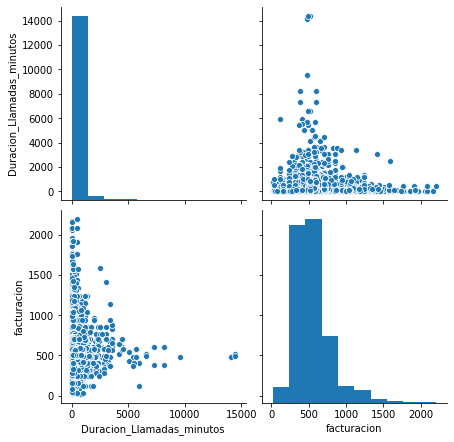

In [16]:
sns.pairplot(facturacion_llamadas, height=3, palette="husl")

El gráfico no parece mostrar una relación lineal evidente entre las variables. Sin embargo, se aprecia una caída de los valores extremos de duración de llamada a medida que incrementa el monto de facturación. Cabe considerar la posibilidad de una curva de ajuste no lineal.

paso 2 bis: adición de curva de regresión

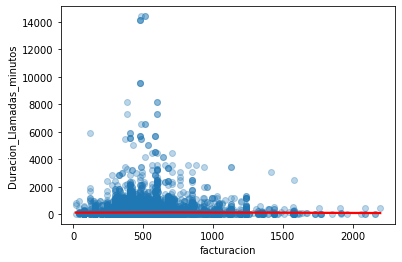

In [17]:
sns.regplot(data=facturacion_llamadas, x="facturacion", y="Duracion_Llamadas_minutos", lowess=True, line_kws={"color": "red"}, scatter_kws={'alpha':0.3})

El gráfico muestra en color <span style="color:red">rojo</span> la curva que mejor se ajusta a los datos (color <span style="color:blue">azul</span>). Si bien el gráfico de dispersión parece formar una relación exponencial negativa, la gran cantidad de datos bajos (debajo de *2000* minutos) mantiene dicha linea recta como mejor ajuste. Los datos superiores a *2000* entonces no generan gravitación suficiente sobre el conjunto de datos.

paso 3: análisis de correlación

In [18]:
facturacion_llamadas.corr()

,Duracion_Llamadas_minutos,facturacion
Duracion_Llamadas_minutos,1.000000,-0.020872
facturacion,-0.020872,1.000000


Se demuestra nuevamente que la relacion lineal entre las variables es muy débil. La proporción negativa resulta mínima.

## Ejercicio 6 <a id='ej6'></a>
[Volver al inicio](#inicio)
### Hay alguna relación entre la facturación y el cambio de plan. (hay alguna métrica estadística que lo sustente?)

paso 1: construir tabla que contenga ambas variables.

In [19]:
facturacion_planes = SQL.sqldf("""
    SELECT f.facturacion, c."numero de planes usados"
    FROM facturacion f
    INNER JOIN cliente_cambio_plan c ON
    f.nro_cliente = c.nro_cliente
    WHERE facturacion > 0 --las facturaciones nulas pueden alterar los ejercicios siguientes
""")
facturacion_planes

,facturacion,numero de planes usados
0,935.8301,2
1,1352.8632,1
2,602.0372,1
3,847.5758,2
4,423.7930,2
...,...,...
30826,593.2979,1
30827,199.7500,2
30828,566.2178,1
30829,79.9000,1


paso 2: plot + histogramas 

'El histograma demuestra que la mayor cantidad de personas realizaron 1 modificación de su plan, mientras que sólo una minoría modificó su plan 2 veces durante el trimestre'

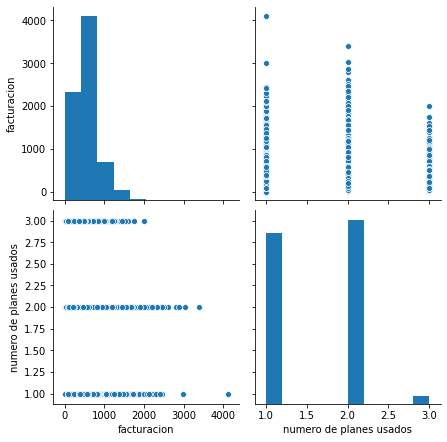

In [20]:
sns.pairplot(facturacion_planes, height=3, palette="husl")
'''El histograma demuestra que la mayor cantidad de personas realizaron 1 modificación de su plan, mientras que sólo una minoría modificó su plan 2 veces durante el trimestre'''

paso 3: estadísticos descriptivos generales del set

In [21]:
facturacion_planes.groupby("numero de planes usados").describe()

facturacion                                   \
                              count        mean         std      min   
numero de planes usados                                                
1                           14545.0  561.758888  242.531799   0.0101   
2                           15652.0  564.205048  264.913767   8.1201   
3                             634.0  531.109469  272.967574  19.9750   

                                                                     
                               25%       50%         75%        max  
numero de planes usados                                              
1                        409.97890  494.4167  619.698100  4111.4854  
2                        409.97890  494.4167  666.032100  3390.3132  
3                        377.73195  485.4746  668.655525  1999.0121

paso 4: gráfico comparativo

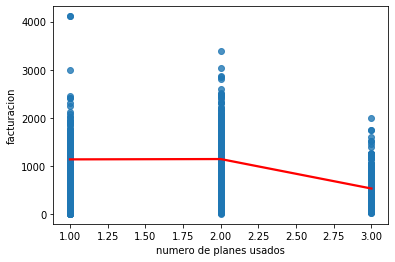

In [22]:
sns.regplot(data=facturacion_planes, y="facturacion", x="numero de planes usados", lowess=True, line_kws={"color": "red"})

Si bien no se expresa una relación lineal clara, sí es posible observar que el grupo con mayor cantidad de cambio de planes es el que menor facturación recibió. Por otro lado, no se manifiesta una diferencia significativa entre el grupo sin cambios y el grupo de cambio único

*alternativa*: es posible unificar las categorías en forma binomial, de la forma "cambió de plan" (1) Vs. "no cambió de plan" (0)


In [23]:
facturacion_planes["numero de planes usados"] = facturacion_planes["numero de planes usados"].replace([1], 0) 
facturacion_planes["numero de planes usados"] = facturacion_planes["numero de planes usados"].replace([2, 3], 1) 

In [24]:
facturacion_planes.groupby("numero de planes usados").describe()

facturacion                                            \
                              count        mean         std     min       25%   
numero de planes usados                                                         
0                           14545.0  561.758888  242.531799  0.0101  409.9789   
1                           16286.0  562.916666  265.300512  8.1201  409.9789   

                                                        
                              50%       75%        max  
numero de planes usados                                 
0                        494.4167  619.6981  4111.4854  
1                        494.4167  666.0321  3390.3132

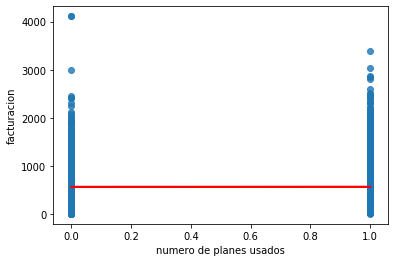

In [25]:
sns.regplot(data=facturacion_planes, y="facturacion", x="numero de planes usados", fit_reg=True, line_kws={"color": "red"})

En la aplicación de categorías dicotómicas, no se observan diferencias significativas entre grupos.

## Ejercicio 7 <a id='ej7'></a>
[Volver al inicio](#inicio)
### En base a lo que pudiste ver en las tablas anteriores que otra fuente de datos crees que seria interesante agregar para profundizar el análisis

Existen otro tipo de variables que permitirían conocer con mayor profundidad los diferentes perfiles de clientes 
que consumen los servicios ofrecidos por la empresa. Variables de esta índole pueden ser:
- Edad
- Ingreso bruto
- Integrantes de familia
- Nivel educativo

Esta información adicional podría ser utilizada para evidenciar segmentos o clusterizados de clientes, identificados por características de consumos particulares. A su vez, sería interesante contar con resultados de UX para sondear la respuesta ante la calidad de servicio ofrecido, y actuar en consecuencia. A estos últimos indicadores podría agregarse la cantidad de usuarios de alta, con el objeto de configurar paquetes y beneficios a conveniencia.

Por último, es de destacar que el presente análisis se efectuó con una única variable monetaria. Otro tipo de estudio, como por ejemplo riesgo de deuda, también sería posible accediendo a variables como deudores morosos o clientes dados de baja.
